# Santander Customer Transaction Prediction

This is my first try on kaggle and also my project for EE551.

## Description

The competition name is [Santander Customer Transaction Prediction](https://www.kaggle.com/c/santander-customer-transaction-prediction). It aims to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. 

First, we read the csv data.

In [34]:
import numpy as np
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [35]:
print(train.shape, test.shape)

(200000, 202) (200000, 201)


In [36]:
train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


From above we can see one ID_code column, one target colunm and the rest 200 columns are features.

Then we can extract target and features.

In [37]:
features = [t for t in train.columns if t not in ['ID_code', 'target']]
target = train['target']

## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. [Wikipeida](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
  
In most Kaggle competitions, usually EDA is the first step we would apply on our implementation.Because we need to know what our data look like, then we can use relative methods to cope with them.
[ref](https://www.kaggle.com/allunia/santander-customer-transaction-eda)

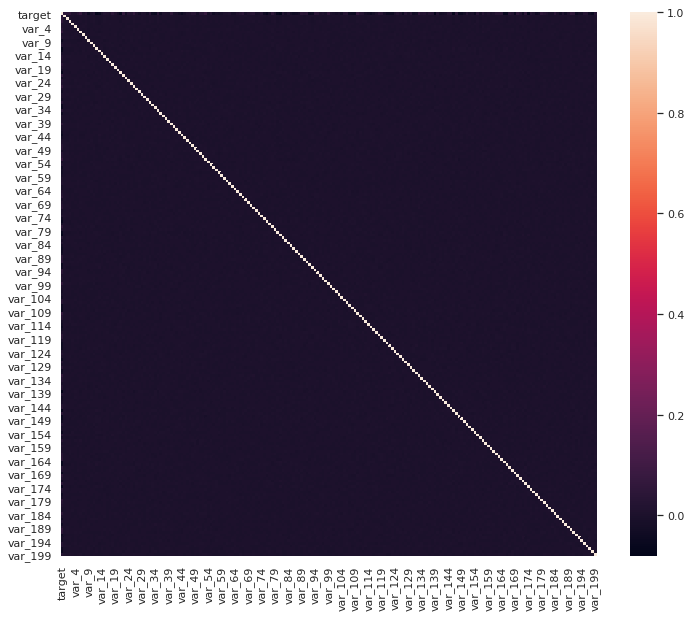

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
train_corr = train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(train_corr)

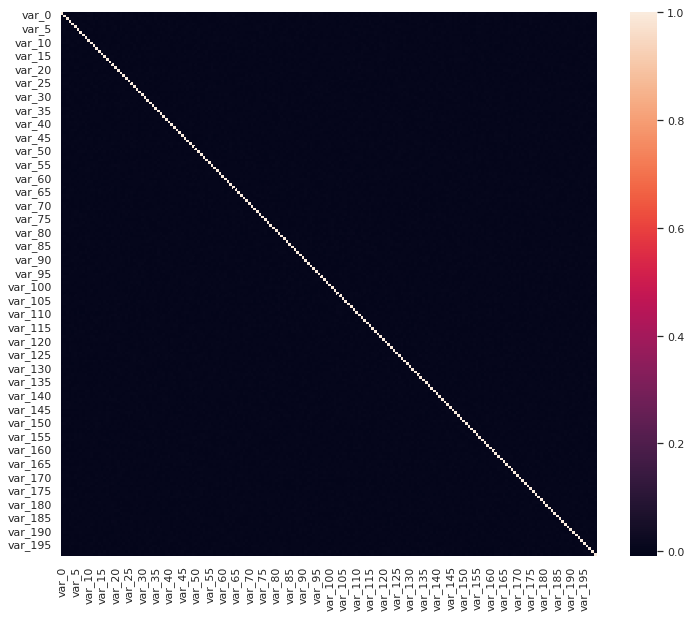

In [39]:
%matplotlib inline
test_corr = test.corr()
plt.figure(figsize=(12,10))
sns.heatmap(test_corr)

From the correlation fig above, we can see basically the features are not correlated so we might not extract more useful information

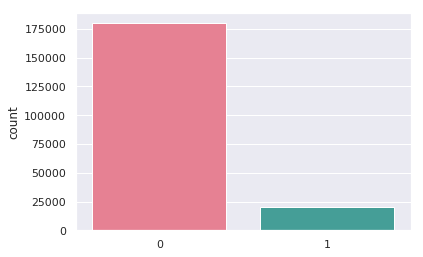

In [40]:
sns.countplot(train.target.values,palette="husl")#histogram of target 

The target data is unbalanced.

Here we define a function to show the density plot of variables in train dataset.

In [41]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

Show the first 100 features PDF

<Figure size 432x288 with 0 Axes>

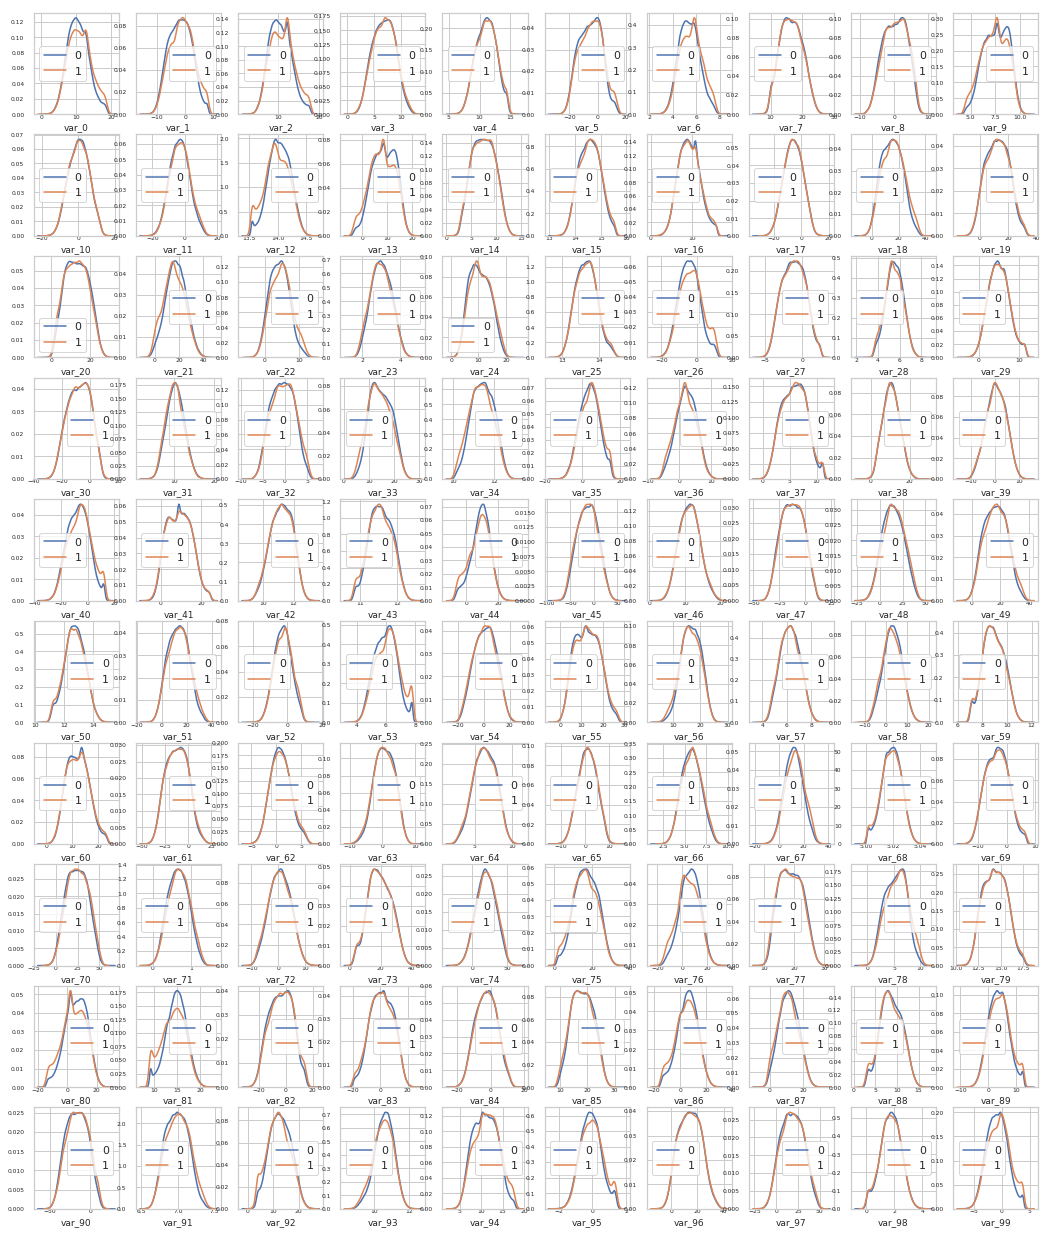

In [42]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

Show the rest 100 features PDF

<Figure size 432x288 with 0 Axes>

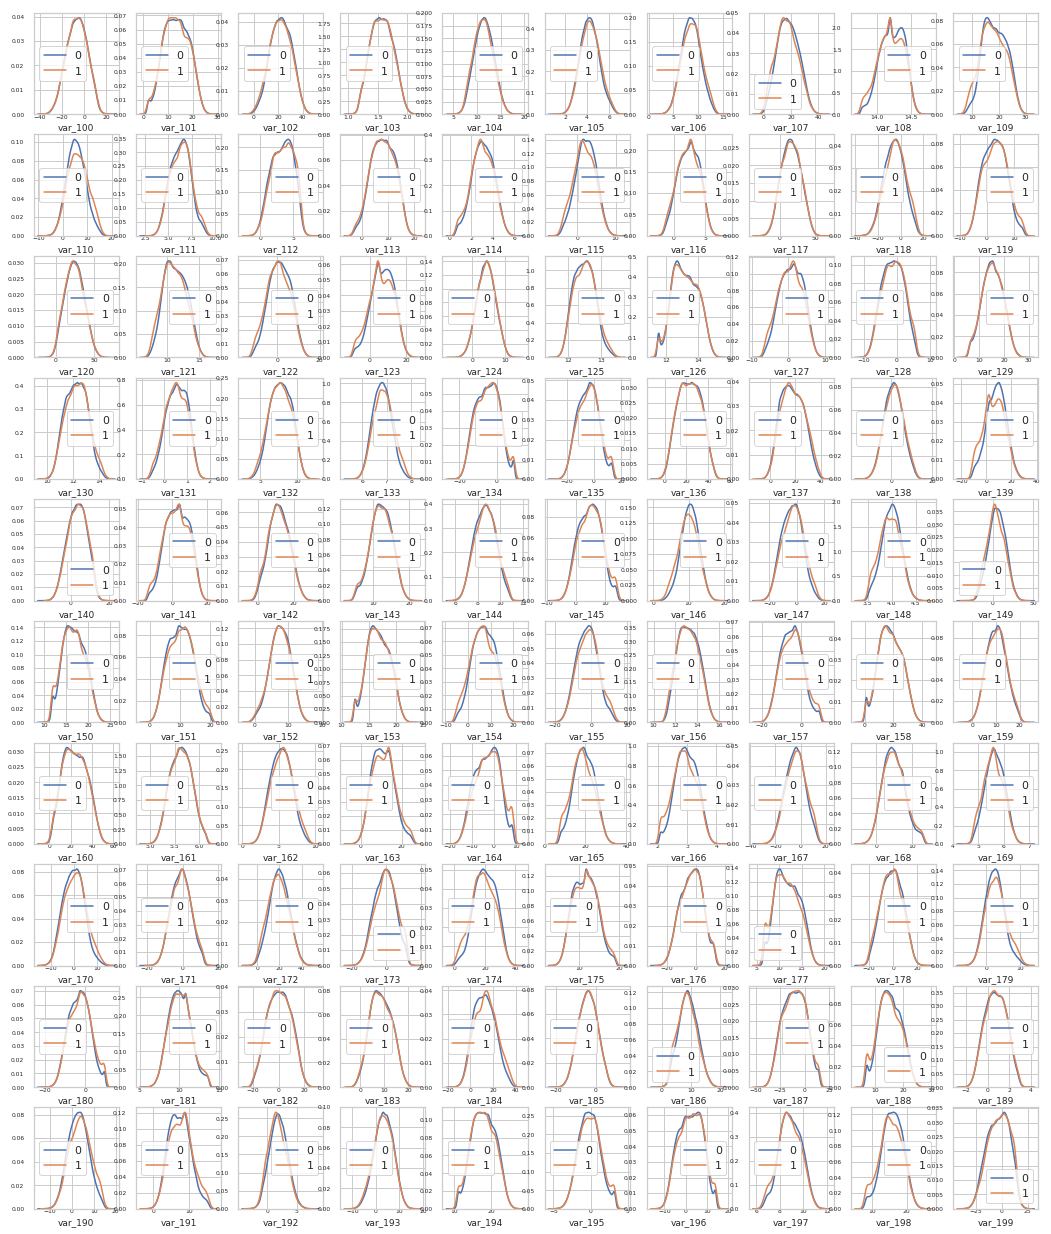

In [43]:
features = train.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

In [44]:
print('Missing value in training data: %d; Missing value in test data: %d' % (train.isnull().sum().sum(),test.isnull().sum().sum()))

Missing value in training data: 0; Missing value in test data: 0


In [45]:
train.drop(['ID_code','target'],axis=1).nunique().sort_values()

var_68        451
var_91       7962
var_108      8525
var_103      9376
var_12       9561
var_148     10608
var_161     11071
var_71      13527
var_25      14853
var_43      15188
var_125     16059
var_166     17902
var_169     18242
var_133     19236
var_15      19810
var_131     21464
var_23      24913
var_34      25164
var_93      26708
var_95      29387
var_42      31592
var_50      32308
var_126     32411
var_98      33266
var_53      33460
var_57      35545
var_28      35859
var_130     36638
var_59      37744
var_6       38599
            ...  
var_51     143455
var_118    143667
var_19     144180
var_83     144281
var_137    144397
var_158    144556
var_54     144776
var_82     144829
var_184    145184
var_178    145235
var_30     145977
var_102    146237
var_96     148099
var_149    148504
var_182    149195
var_199    149430
var_100    150727
var_48     152039
var_70     153193
var_47     154781
var_160    156274
var_136    156615
var_187    157031
var_90     157210
var_120   

Here we can see var_68 is a little bit strange. So we can do some exploration on it.

In [46]:
print("Min: %f and max: %f "%(train['var_68'].min(),train['var_68'].max()))

Min: 4.993800 and max: 5.046900 


Many kaggler have discussed about var_68, [here](https://www.kaggle.com/yassinealouini/mystery-behind-var-68)'s a try to transforming var_68 to date data.

In [47]:
from datetime import datetime
epoch_datetime = pd.datetime(1900, 1, 1)
trf_var_68_s = (train['var_68']*10000 - 7000 + epoch_datetime.toordinal()).astype(int)
date_s = trf_var_68_s.map(datetime.fromordinal)
train['date'] = date_s
sorted_train_df = train.drop('var_68', axis=1).sort_values('date')


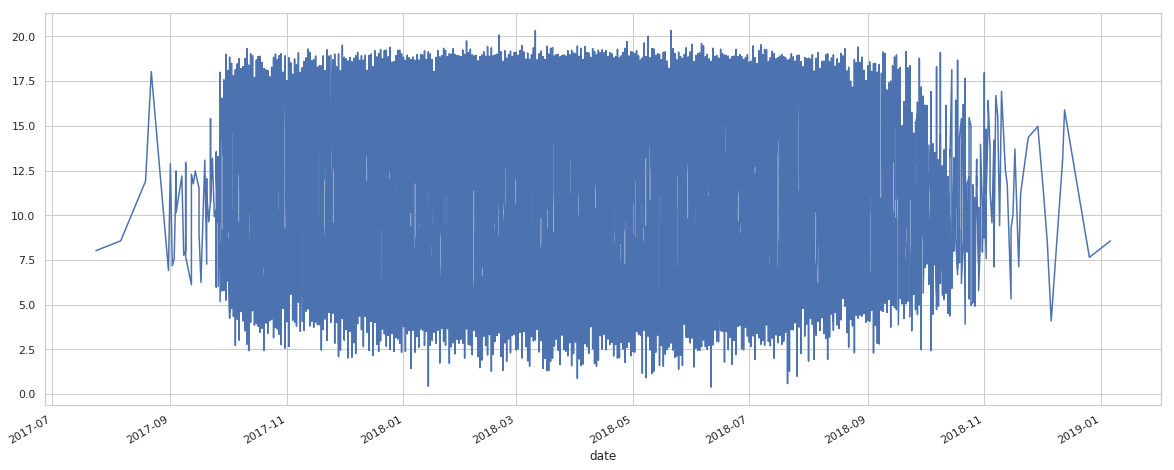

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sorted_train_df.set_index('date')['var_0'].plot(ax=ax)

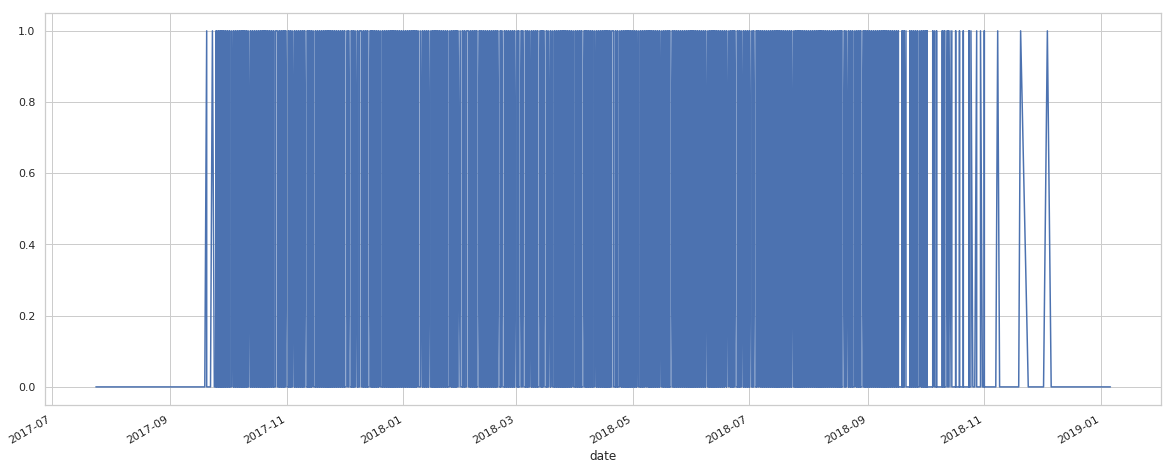

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sorted_train_df.set_index('date')['target'].plot(ax=ax)

## Model

I have tried xgboost, catboost and lightgbm. My final model is based on [lightgbm].(https://lightgbm.readthedocs.io/en/latest/)

In [52]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

import lightgbm as lgb

random_state = 42
np.random.seed(random_state)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
param = {
    "objective" : "binary",
    "metric" : "auc",
    "boosting": 'gbdt',
    "max_depth" : -1,
    "num_leaves" : 13,
    "learning_rate" : 0.01,
    "bagging_freq": 5,
    "bagging_fraction" : 0.4,
    "feature_fraction" : 0.05,
    "min_data_in_leaf": 80,
    "min_sum_heassian_in_leaf": 10,
    "tree_learner": "serial",
    "boost_from_average": "false",
    "bagging_seed" : random_state,
    "verbosity" : 1,
    "seed": random_state,
   # "device": 'gpu',
   # "gpu_platform_id": 0,
   # "gpu_device_id": 0
    #'num_threads': 8,


}

Training model

In [53]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
features = [t for t in train.columns if t not in ['ID_code', 'target']]
target = train['target']
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.900489	valid_1's auc: 0.881504
[2000]	training's auc: 0.911129	valid_1's auc: 0.888576
[3000]	training's auc: 0.918832	valid_1's auc: 0.892928
[4000]	training's auc: 0.924793	valid_1's auc: 0.895667
[5000]	training's auc: 0.929894	valid_1's auc: 0.89734
[6000]	training's auc: 0.934473	valid_1's auc: 0.898401
[7000]	training's auc: 0.938594	valid_1's auc: 0.899186
[8000]	training's auc: 0.942527	valid_1's auc: 0.899402
[9000]	training's auc: 0.94618	valid_1's auc: 0.899472
[10000]	training's auc: 0.949716	valid_1's auc: 0.89947
[11000]	training's auc: 0.953118	valid_1's auc: 0.89951
[12000]	training's auc: 0.956407	valid_1's auc: 0.899689
[13000]	training's auc: 0.959507	valid_1's auc: 0.899624
[14000]	training's auc: 0.962422	valid_1's auc: 0.899391
[15000]	training's auc: 0.965279	valid_1's auc: 0.899388
Early stopping, best iteration is:
[12204]	training's auc: 0.957047	valid_1's auc: 0.89

[7000]	training's auc: 0.938686	valid_1's auc: 0.900528
[8000]	training's auc: 0.942641	valid_1's auc: 0.900764
[9000]	training's auc: 0.946379	valid_1's auc: 0.900933
[10000]	training's auc: 0.949938	valid_1's auc: 0.900938
[11000]	training's auc: 0.953326	valid_1's auc: 0.900697
[12000]	training's auc: 0.956594	valid_1's auc: 0.900442
Early stopping, best iteration is:
[9437]	training's auc: 0.947968	valid_1's auc: 0.901013
CV score: 0.90033 


Now we can check the feature importance

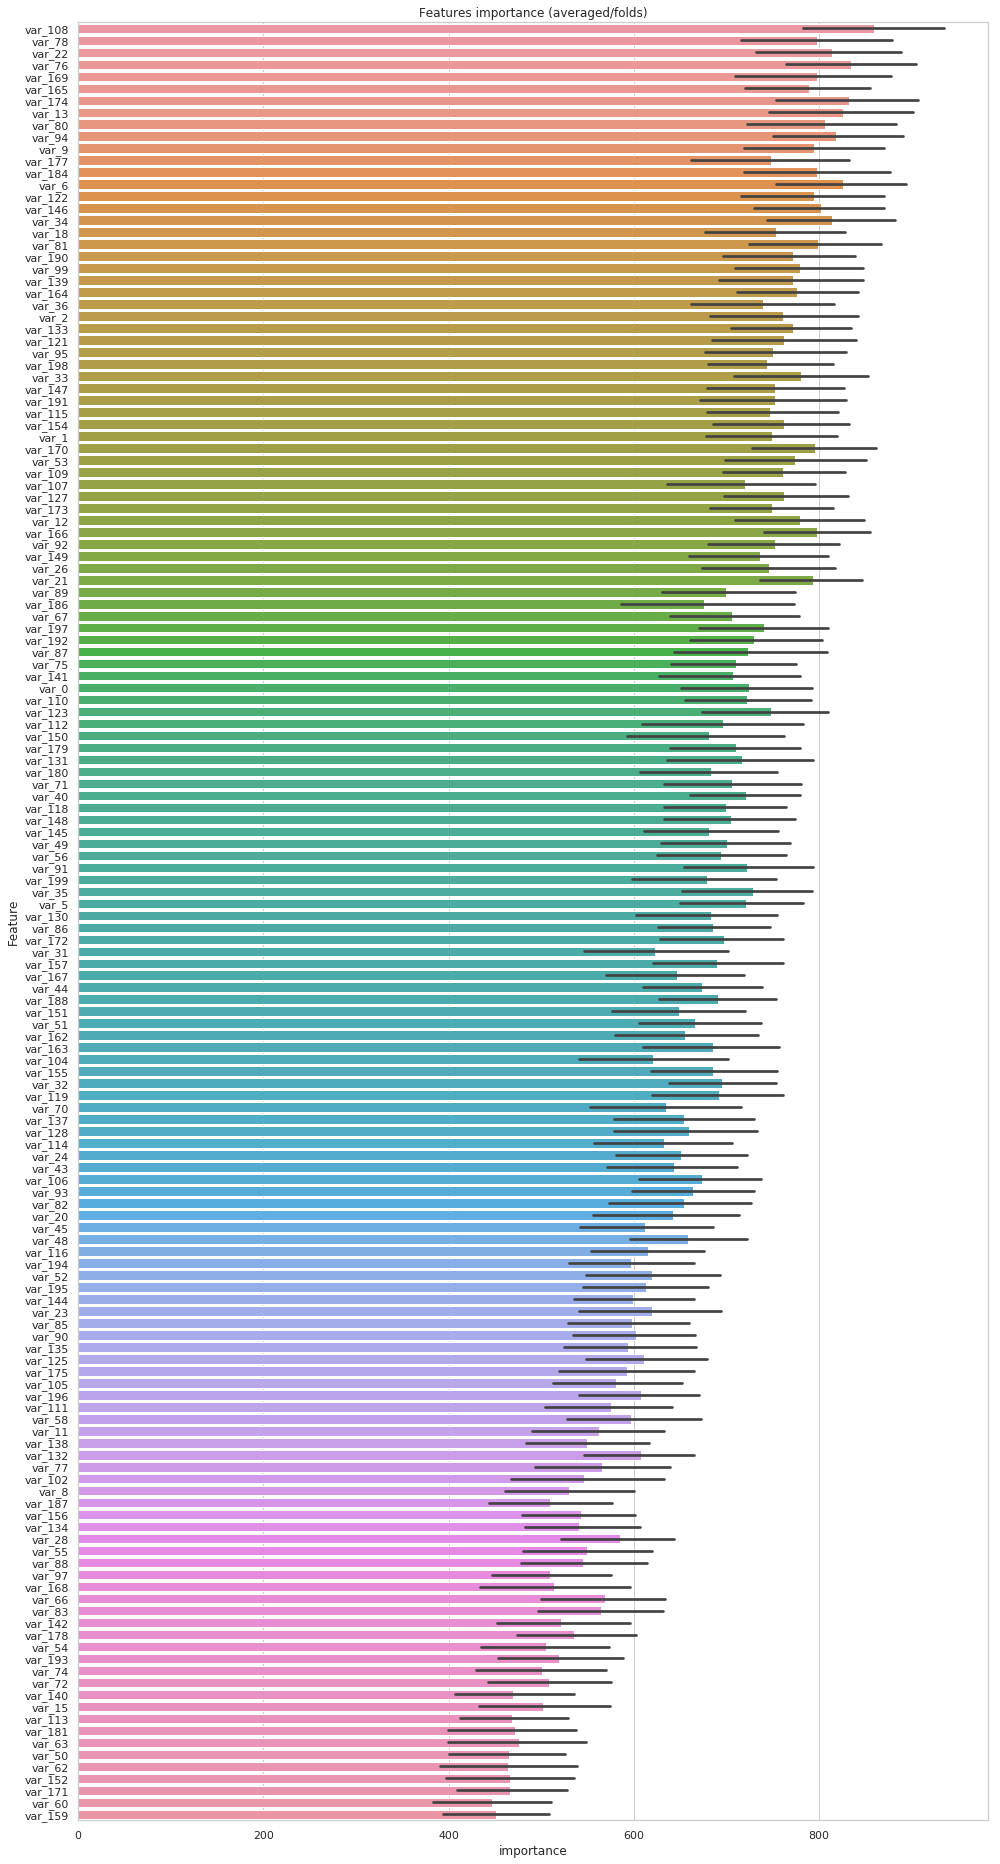

In [55]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('featureImportance.png')

Now we can generate submission file.

In [56]:
submission = pd.DataFrame({"ID_code":test["ID_code"].values})
submission["target"] = predictions
submission.to_csv("submission.csv", index=False)

At the end of this competition, I can't make any improvement on my model. So I checked the discussion page. Many top rankers said there's a magic feature. So I have re-done relative EDA according to their suggestion during the final week.

The first hint is related to the probablity density function. So I plotted some most important features' pdf,least important features' pdf, and var_68's pdf

In [57]:
def pdf(df1,df2,feature):
    negData = df1.loc[df1['target'] == 0][feature]
    posData = df1.loc[df1['target'] == 1][feature]
    testData = df2[feature]

    fig, ax = plt.subplots(ncols = 1, figsize=(20,5))

    fig.suptitle(feature)
    outs1, outs2, outs3 = ax.hist([negData, posData,testData], 
                                  bins=50, 
                                  density = True, 
                                  histtype='step', 
                                  label=("target 0", "target 1","test"),
                                  linewidth=3)
    ax.set_xticks(outs2)
    ax.xaxis.grid(True)
    handles, labels=ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    fig.show()
    plt.show()

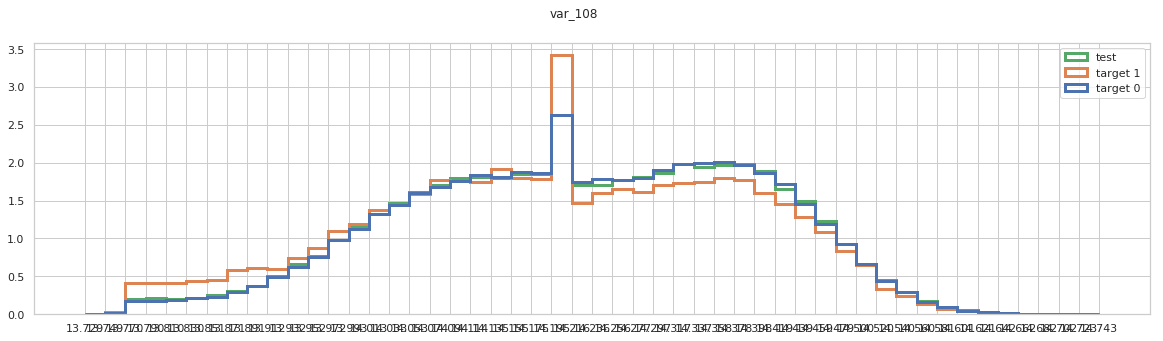

In [59]:
pdf(train,test,'var_108')

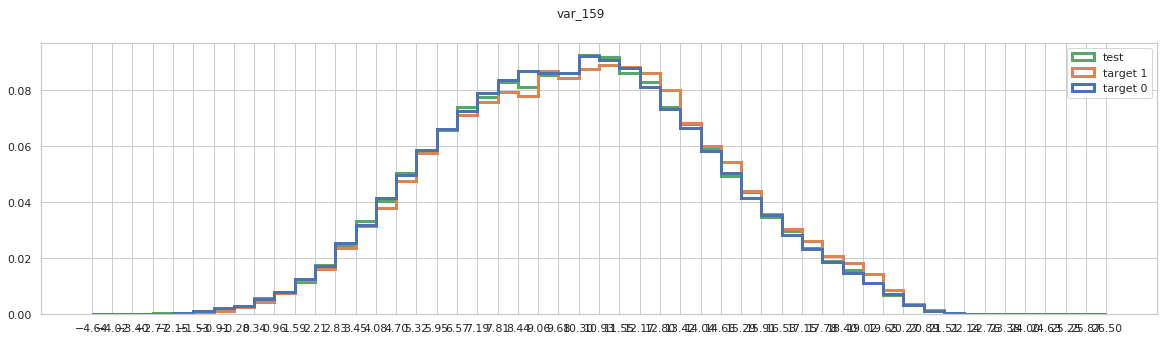

In [60]:
pdf(train,test,'var_159')

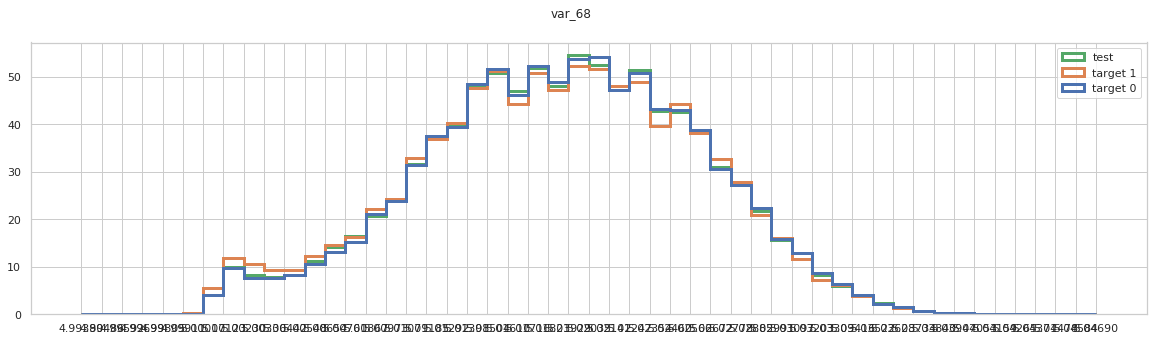

In [61]:
pdf(train,test,'var_68')

The second hint is related to fake data in the test dataset. You can see the kernel [here](https://www.kaggle.com/yag320/list-of-fake-samples-and-public-private-lb-split). I also wanted to generate some features according to this, but I did not know how to extract useful information from the fake data.

There are many other failed try on my path to find magic feature. But since I didn't find it, I would not post them here(Actually it's because I didn't save them on my original notebook file)

The real magic feature is related to the second hint, you can see the [1st place solution](https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/89003#latest-521279) for details.

## Conclusion

Actually, in the last week, I was so close to the magic feature. But I just didn't find it. T_T

My final ranking is 27%. I guess it's okay for a beginner and at least I have gained so much experience. There're so many talented and helpful people in kaggle community. I will try more kaggle competitions in the future.

## Reference

* https://www.kaggle.com/allunia/santander-customer-transaction-eda
* https://www.kaggle.com/chocozzz/santander-lightgbm-baseline-lb-0-899
* https://www.kaggle.com/yassinealouini/mystery-behind-var-68
